# Dow Jones YTD (year to date) Perforemane vs 52 Week Range:
## exploratory data analysis with new visualization map

## by Ori Rosenthal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib as u
from bs4 import BeautifulSoup as bs
from iexfinance import get_historical_data
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dj_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
df = pd.read_html(dj_url, header=0)[1]
df.index = df.index +1
df = df[['Symbol', 'Company']]
df.head()

,Symbol,Company
1,MMM,3M
2,AXP,American Express
3,AAPL,Apple
4,BA,Boeing
5,CAT,Caterpillar


In [3]:
mydict = dict(zip(df.Symbol, df.Company))

In [4]:
mydict

{'AAPL': 'Apple',
 'AXP': 'American Express',
 'BA': 'Boeing',
 'CAT': 'Caterpillar',
 'CSCO': 'Cisco Systems',
 'CVX': 'Chevron',
 'DIS': 'Walt Disney',
 'DWDP': 'DowDuPont',
 'GS': 'Goldman Sachs',
 'HD': 'The Home Depot',
 'IBM': 'IBM',
 'INTC': 'Intel',
 'JNJ': 'Johnson & Johnson',
 'JPM': 'JPMorgan Chase',
 'KO': 'Coca-Cola',
 'MCD': "McDonald's",
 'MMM': '3M',
 'MRK': 'Merck & Company',
 'MSFT': 'Microsoft',
 'NKE': 'Nike',
 'PFE': 'Pfizer',
 'PG': 'Procter & Gamble',
 'TRV': 'Travelers',
 'UNH': 'UnitedHealth Group',
 'UTX': 'United Technologies',
 'V': 'Visa',
 'VZ': 'Verizon',
 'WBA': 'Walgreens Boots Alliance',
 'WMT': 'Walmart',
 'XOM': 'ExxonMobil'}

In [5]:
dj_list = df.Symbol.tolist()

In [6]:
def get_MktCap( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Market Cap')
        mc_ = mc.find_next(class_='snapshot-td2').text
        print( '{} Market Cap = {}'.format(symbol, mc_) )
        return mc_
    except Exception as e:
        print(e)
        
MrktCap = pd.Series(index=dj_list)
for sym in dj_list:
    MrktCap[sym] = get_MktCap(sym)

MMM Market Cap = 121.57B
AXP Market Cap = 91.13B
AAPL Market Cap = 817.42B
BA Market Cap = 242.05B
CAT Market Cap = 79.69B
CVX Market Cap = 225.85B
CSCO Market Cap = 228.75B
KO Market Cap = 194.23B
DWDP Market Cap = 125.45B
XOM Market Cap = 334.93B
GS Market Cap = 75.54B
HD Market Cap = 218.36B
IBM Market Cap = 126.88B
INTC Market Cap = 238.72B
JNJ Market Cap = 366.53B
JPM Market Cap = 354.49B
MCD Market Cap = 141.55B
MRK Market Cap = 215.01B
MSFT Market Cap = 841.00B
NKE Market Cap = 132.30B
PFE Market Cap = 252.39B
PG Market Cap = 250.73B
TRV Market Cap = 34.56B
UNH Market Cap = 257.23B
UTX Market Cap = 106.98B
VZ Market Cap = 235.42B
V Market Cap = 316.62B
WMT Market Cap = 284.97B
WBA Market Cap = 65.25B
DIS Market Cap = 171.72B


In [7]:
df['MarketCap'] = MrktCap.values

In [9]:
def get_Perf_YTD( symbol ):
    try:
        url = r'http://finviz.com/quote.ashx?t={}'.format(symbol.lower())
        html = u.request.urlopen(url).read()
        soup = bs(html, 'lxml')
        mc =  soup.find(text = r'Perf YTD')
        mc_ = mc.find_next(class_='snapshot-td2').text
        return mc_
    except Exception as e:
        pass
        

In [10]:
df['YTD'] = df.Symbol.apply(get_Perf_YTD)

In [16]:
df

,Symbol,Company,MarketCap,YTD
1,MMM,3M,121.57B,9.87%
2,AXP,American Express,91.13B,12.72%
3,AAPL,Apple,817.42B,9.66%
4,BA,Boeing,242.05B,31.49%
5,CAT,Caterpillar,79.69B,9.14%
6,CVX,Chevron,225.85B,9.74%
7,CSCO,Cisco Systems,228.75B,15.65%
8,KO,Coca-Cola,194.23B,-4.37%
9,DWDP,DowDuPont,125.45B,2.79%
10,XOM,ExxonMobil,334.93B,15.00%


In [17]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import fix_yahoo_finance as yf

start = datetime(2018, 1, 1)
end = datetime.today()

df_list = []
 
#not all stocks will return data so set up an empty list to store the stock tickers that actually successfully returns data
used_stocks = []
 
#iterate over stock tickers in list and download relevant data
for stock in dj_list:
    dat = get_historical_data(stock, start=start, end=end, output_format='pandas')['close']
    dat.columns = [stock]
    df_list.append(dat)
    used_stocks.append(stock)
    

In [18]:
df1 = pd.concat(df_list,axis=1)
df1.columns = dj_list
df1 = df1.round(2)
df1.head()

In [52]:
for i in dj_list:
    print(i, ((df1[i][-1:] - df1[i][-252:].min()) / (df1[i][-252:].max() - df1[i][-252:].min()))[0].round(2))

MMM 0.53
AXP 0.79
AAPL 0.35
BA 1.0
CAT 0.56
CVX 0.75
CSCO 1.0
KO 0.48
DWDP 0.25
XOM 0.68
GS 0.35
HD 0.63
IBM 0.7
INTC 0.75
JNJ 0.63
JPM 0.53
MCD 0.88
MRK 1.0
MSFT 0.87
NKE 0.97
PFE 0.77
PG 1.0
TRV 0.68
UNH 0.75
UTX 0.67
VZ 0.8
V 0.87
WMT 0.77
WBA 0.44
DIS 0.87


In [54]:
year_relative_range_dict = dict()

for i in dj_list:
    year_relative_range_dict[i] = ((df1[i][-1:] - df1[i][-252:].min()) / (df1[i][-252:].max() - df1[i][-252:].min()))[0].round(2)

In [55]:
year_relative_range_dict

{'AAPL': 0.35,
 'AXP': 0.79,
 'BA': 1.0,
 'CAT': 0.56,
 'CSCO': 1.0,
 'CVX': 0.75,
 'DIS': 0.87,
 'DWDP': 0.25,
 'GS': 0.35,
 'HD': 0.63,
 'IBM': 0.7,
 'INTC': 0.75,
 'JNJ': 0.63,
 'JPM': 0.53,
 'KO': 0.48,
 'MCD': 0.88,
 'MMM': 0.53,
 'MRK': 1.0,
 'MSFT': 0.87,
 'NKE': 0.97,
 'PFE': 0.77,
 'PG': 1.0,
 'TRV': 0.68,
 'UNH': 0.75,
 'UTX': 0.67,
 'V': 0.87,
 'VZ': 0.8,
 'WBA': 0.44,
 'WMT': 0.77,
 'XOM': 0.68}

In [56]:
df_test = df.copy()

In [57]:
df_test.head()

,Symbol,Company,MarketCap,YTD
1,MMM,3M,121.57B,9.87%
2,AXP,American Express,91.13B,12.72%
3,AAPL,Apple,817.42B,9.66%
4,BA,Boeing,242.05B,31.49%
5,CAT,Caterpillar,79.69B,9.14%


In [58]:
df_test.set_index('Symbol', inplace=True)

In [59]:
df_test.head()

,Company,MarketCap,YTD
Symbol,,,
MMM,3M,121.57B,9.87%
AXP,American Express,91.13B,12.72%
AAPL,Apple,817.42B,9.66%
BA,Boeing,242.05B,31.49%
CAT,Caterpillar,79.69B,9.14%


In [60]:
df_test = df_test.join(pd.DataFrame.from_dict(year_relative_range_dict,orient='index'))

In [61]:
df_test.head()

,Company,MarketCap,YTD,0
Symbol,,,,
MMM,3M,121.57B,9.87%,0.53
AXP,American Express,91.13B,12.72%,0.79
AAPL,Apple,817.42B,9.66%,0.35
BA,Boeing,242.05B,31.49%,1.00
CAT,Caterpillar,79.69B,9.14%,0.56


In [62]:
df_test.columns= [['Company', 'MarketCap', 'YTD', '52WeeksRange']]
df_test.head()

,Company,MarketCap,YTD,52WeeksRange
Symbol,,,,
MMM,3M,121.57B,9.87%,0.53
AXP,American Express,91.13B,12.72%,0.79
AAPL,Apple,817.42B,9.66%,0.35
BA,Boeing,242.05B,31.49%,1.00
CAT,Caterpillar,79.69B,9.14%,0.56


In [63]:
df_test.reset_index(inplace=True)
df_test.index = df_test.index +1

In [64]:
df_test.columns

MultiIndex(levels=[['52WeeksRange', 'Company', 'MarketCap', 'YTD', 'Symbol']],
           labels=[[4, 1, 2, 3, 0]])

In [65]:
df_test.columns = df_test.columns.map(''.join)

In [66]:
df_test.columns

Index(['Symbol', 'Company', 'MarketCap', 'YTD', '52WeeksRange'], dtype='object')

In [67]:
df_test.MarketCap = df_test.MarketCap.str[:-1]
df_test.YTD = df_test.YTD.str[:-1]

In [68]:
df_test.head()

,Symbol,Company,MarketCap,YTD,52WeeksRange
1,MMM,3M,121.57,9.87,0.53
2,AXP,American Express,91.13,12.72,0.79
3,AAPL,Apple,817.42,9.66,0.35
4,BA,Boeing,242.05,31.49,1.00
5,CAT,Caterpillar,79.69,9.14,0.56


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Data columns (total 5 columns):
Symbol          30 non-null object
Company         30 non-null object
MarketCap       30 non-null object
YTD             30 non-null object
52WeeksRange    30 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [70]:
df_test['YTD']=pd.to_numeric(df_test['YTD'])
df_test['MarketCap']=pd.to_numeric(df_test['MarketCap'])

In [71]:
df_test2 = df_test.copy()
df_test2.set_index('Symbol', inplace=True)
market_cap_sorted = df_test2.MarketCap.sort_values()
market_cap_sorted_DF = pd.DataFrame(market_cap_sorted)
market_cap_sorted_DF.head()

,MarketCap
Symbol,
TRV,34.56
WBA,65.25
GS,75.54
CAT,79.69
AXP,91.13


In [72]:
market_cap_sorted_DF.MarketCap.describe()

count     30.0000
mean     238.2440
std      183.4436
min       34.5600
25%      125.8075
50%      222.1050
75%      256.0200
max      841.0000
Name: MarketCap, dtype: float64

In [73]:
market_cap_sorted_DF['group'] = 0
market_cap_sorted_DF.iloc[:6,1] = 20
market_cap_sorted_DF.iloc[6:12,1] = 25
market_cap_sorted_DF.iloc[12:18,1] = 30
market_cap_sorted_DF.iloc[18:24,1] = 35
market_cap_sorted_DF.iloc[24:38,1] = 40
market_cap_sorted_DF.iloc[28:30,1] = 45

In [74]:
market_cap_sorted_DF

,MarketCap,group
Symbol,,
TRV,34.56,20
WBA,65.25,20
GS,75.54,20
CAT,79.69,20
AXP,91.13,20
UTX,106.98,20
MMM,121.57,25
DWDP,125.45,25
IBM,126.88,25


In [111]:
df_test3 = pd.concat([df_test2,market_cap_sorted_DF['group']],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [112]:
df_test3.head()

,Company,MarketCap,YTD,52WeeksRange,group
AAPL,Apple,817.42,9.66,0.35,45
AXP,American Express,91.13,12.72,0.79,20
BA,Boeing,242.05,31.49,1.00,35
CAT,Caterpillar,79.69,9.14,0.56,20
CSCO,Cisco Systems,228.75,15.65,1.00,30


In [113]:
df_test3['52WeeksRange'] = (df_test3['52WeeksRange']*100)

In [114]:
df_test3.reset_index(inplace=True)
df_test3.columns = ['Symbol','Company','MarketCap','YTD','52WeeksRange','group']
df_test3.index= df_test3.index +1
diaYTD = get_Perf_YTD('DIA')
end = datetime.today()
dia_hist = get_historical_data('DIA', start=start, end=end, output_format='pandas')['close']
dia_dd = ((dia_hist[-1:] - dia_hist[-252:].min()) / (dia_hist[-252:].max() - dia_hist[-252:].min()))[0].round(2)*100
dia = diaYTD[:-1]
dia = float(dia)

In [116]:
from adjustText import adjust_text
import matplotlib.ticker as mtick
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

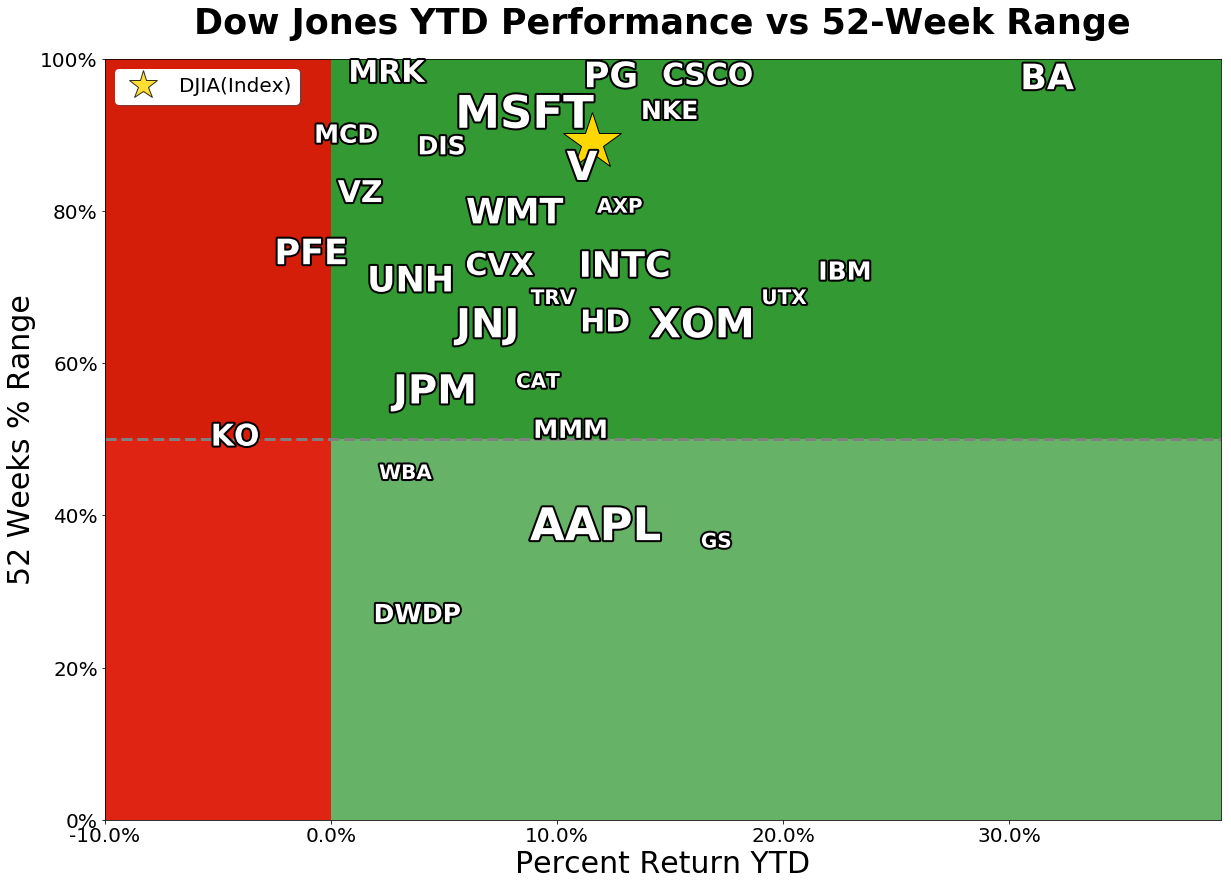

In [257]:
fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(1,1,1) 
font0 = FontProperties()
norm=plt.Normalize(0,100)
c1 = df_test3['52WeeksRange'].tolist()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green"])
plt.hlines(50,xmax=df_test3.YTD.max() *1.25, xmin= -10,color='gray', linestyle='--',linewidth=3)


ax.margins(0)
ax.axhspan(xmin=0, xmax=df_test3.YTD.max() *1.25,ymin=0, ymax=50, facecolor='green', alpha=0.6)
ax.axhspan(xmin=0, xmax=df_test3.YTD.max() *1.25, ymin=50, ymax=100, facecolor='green', alpha=0.8)
ax.axvspan(xmin=-10, xmax=0,ymin=0, ymax=50, facecolor='red', alpha=0.8)
ax.axvspan(xmin=-10, xmax=0, ymin=50, ymax=100, facecolor='red', alpha=0.1)
plt.plot(dia, dia_dd,marker = '*' ,markersize=60,markeredgecolor='k', color='gold', lw=3);
plt.scatter(df_test3.YTD, (df_test3['52WeeksRange']), c='w', alpha=0.7,cmap=cmap, norm=norm);


font = font0.copy()
font.set_style('italic')
font.set_weight('bold')
font.set_size('x-small')


text = [plt.annotate(row[0], (df_test3.YTD[index]-1, df_test3['52WeeksRange'][index]),fontsize=row[5],weight = 'semibold',
         path_effects=[pe.withStroke(linewidth=4, foreground="k")], color='w') for index, row in df_test3.iterrows()]


ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0,100)
plt.yticks(fontsize=20)
plt.xticks(color='k', fontsize=20)
plt.xlabel('Percent Return YTD', fontsize=30)
plt.ylabel('52 Weeks % Range', fontsize=30)
plt.title('Dow Jones YTD Performance vs 52-Week Range', fontsize=35, pad=25,weight = 'semibold')


blue_line = mlines.Line2D([], [],lw=3, color='gold', marker='*',linestyle='None',
                          markeredgecolor='k',alpha=0.8, markersize=30, label='DJIA(Index)')
plt.legend(handles=[blue_line], loc=2, fontsize=20, facecolor=None,edgecolor="w", shadow=True)


adjust_text(text);